# Color-magnitude diagram: broadband filters

The tutorial shows how to create a color-magnitude diagram which combines the photometry from field and young/low-gravity objects, synthetic photometry computed from isochrones and model spectra, and photometry from directly imaged objects.

## Initiating *species*

In [1]:
import urllib.request
import numpy as np
import species

In [2]:
species.SpeciesInit()
database = species.Database()

Initiating species v0.1.0... [DONE]
Creating species_config.ini... [DONE]
Database: /Users/tomasstolker/applications/species/docs/tutorials/species_database.hdf5
Data folder: /Users/tomasstolker/applications/species/docs/tutorials/data
Working folder: /Users/tomasstolker/applications/species/docs/tutorials
Creating species_database.hdf5... [DONE]
Creating data folder... [DONE]


## Adding data to the database

All available photometric data of directly imaged planets and brown dwarfs is added with `add_companion` by setting `name=None`. These data are extracted from the [dictionary with apparent magnitudes](https://github.com/tomasstolker/species/blob/master/species/data/companions.py) in the `data.companions` module.

In [3]:
database.add_companion(name=None)

Adding filter: LCO/VisAO.Ys... [DONE]
Adding Vega spectrum... [DONE]
Adding filter: Paranal/NACO.J... [DONE]
Adding filter: Gemini/NICI.ED286... [DONE]
Adding filter: Paranal/NACO.H... [DONE]
Adding filter: Paranal/NACO.Ks... [DONE]
Adding filter: Paranal/NACO.NB374... [DONE]
Adding filter: Paranal/NACO.Lp... [DONE]
Adding filter: Paranal/NACO.NB405... [DONE]
Adding filter: Paranal/NACO.Mp... [DONE]
Adding object: beta Pic b... [DONE]
Adding filter: Paranal/SPHERE.IRDIS_D_H23_2... [DONE]
Adding filter: Paranal/SPHERE.IRDIS_D_H23_3... [DONE]
Adding filter: Paranal/SPHERE.IRDIS_D_K12_1... [DONE]
Adding filter: Paranal/SPHERE.IRDIS_D_K12_2... [DONE]
Adding object: HIP 65426 b... [DONE]
Adding filter: MKO/NSFCam.J... [DONE]
Adding filter: MKO/NSFCam.H... [DONE]
Adding filter: MKO/NSFCam.K... [DONE]
Adding filter: Keck/NIRC2.Lp... [DONE]
Adding filter: Keck/NIRC2.Ms... [DONE]
Adding object: 51 Eri b... [DONE]
Adding filter: Subaru/CIAO.z... [DONE]
Adding filter: Paranal/SPHERE.IRDIS_B_J... 

The broadband photometry and parallaxes of the [Database of Ultracool Parallaxes](http://www.as.utexas.edu/~tdupuy/plx/Database_of_Ultracool_Parallaxes.html) is added.

In [4]:
database.add_photometry(phot_library='vlm-plx')

Adding Database of Ultracool Parallaxes... [DONE]


The isochrones from the AMES-Cond and AMES-Dusty evolutionary models are downloaded with `urllib.request`.

In [5]:
urllib.request.urlretrieve('https://phoenix.ens-lyon.fr/Grids/AMES-Cond/ISOCHRONES/model.AMES-Cond-2000.M-0.0.NaCo.Vega',
                           'data/model.AMES-Cond-2000.M-0.0.NaCo.Vega')

'data/model.AMES-dusty.M-0.0.NaCo.Vega'

In [ ]:
urllib.request.urlretrieve('https://phoenix.ens-lyon.fr/Grids/AMES-Dusty/ISOCHRONES/model.AMES-dusty.M-0.0.NaCo.Vega',
                           'data/model.AMES-dusty.M-0.0.NaCo.Vega')

And added to the HDF5 database.

In [6]:
database.add_isochrones(filename='data/model.AMES-Cond-2000.M-0.0.NaCo.Vega',
                        tag='iso_cond',
                        model='baraffe')

database.add_isochrones(filename='data/model.AMES-dusty.M-0.0.NaCo.Vega',
                        tag='iso_dusty',
                        model='baraffe')

Adding isochrones: iso_cond... [DONE]
Adding isochrones: iso_dusty... [DONE]


Also the synthetic spectra from the AMES-Cond and AMES-Dusty atmospheric models are dowloaded and added to the database.

In [7]:
database.add_model(model='ames-cond',
                   wavel_range=(0.5, 10.),
                   spec_res=1000.,
                   teff_range=(100., 4000.))

database.add_model(model='ames-dusty',
                   wavel_range=(0.5, 10.),
                   spec_res=1000.,
                   teff_range=(100., 4000.))

Unpacking AMES-Cond model spectra (823 MB)... [DONE]
Adding AMES-Cond model spectra... [DONE]                                        
Unpacking AMES-Dusty model spectra [Fe/H]=0.0 (106 MB)... [DONE]
Adding AMES-Dusty model spectra... [DONE]                                       


/Users/tomasstolker/applications/species/species/util/data_util.py:268: UserWarning: Interpolation is not possible at the edge of the parameter grid. A NaN value is stored for Teff = 4000.0 K.
  warnings.warn(f'Interpolation is not possible at the edge of the '


## Database content

Let's have a look at all the data that is stored in the database.

In [8]:
database.list_content()

Database content:
- filters: <HDF5 group "/filters" (10 members)>
	- CFHT: <HDF5 group "/filters/CFHT" (4 members)>
		- Wircam.H: <HDF5 dataset "Wircam.H": shape (2, 747), type "<f4">
		- Wircam.J: <HDF5 dataset "Wircam.J": shape (2, 1077), type "<f4">
		- Wircam.Ks: <HDF5 dataset "Wircam.Ks": shape (2, 791), type "<f4">
		- Wircam.Y: <HDF5 dataset "Wircam.Y": shape (2, 875), type "<f4">
	- Gemini: <HDF5 group "/filters/Gemini" (9 members)>
		- GMOS-S.z: <HDF5 dataset "GMOS-S.z": shape (2, 928), type "<f4">
		- GPI.H: <HDF5 dataset "GPI.H": shape (2, 1895), type "<f4">
		- GPI.K1: <HDF5 dataset "GPI.K1": shape (2, 2128), type "<f4">
		- NICI.ED286: <HDF5 dataset "NICI.ED286": shape (2, 387), type "<f4">
		- NIRI.H-G0203w: <HDF5 dataset "NIRI.H-G0203w": shape (2, 368), type "<f4">
		- NIRI.H2S1v2-1-G0220: <HDF5 dataset "NIRI.H2S1v2-1-G0220": shape (2, 129), type "<f4">
		- NIRI.J-G0202w: <HDF5 dataset "NIRI.J-G0202w": shape (2, 213), type "<f4">
		- NIRI.K-G0204w: <HDF5 dataset "NIRI.K-

## Synthetic photometry from isochrones

Magnitudes are available in the isochrone data which can be extracted with the `get_isochrone` function of `ReadIsochrone`. However, in this example, we consistently recompute the synthetic photometry by making use of both the isochrones and the model spectra.

The isochrones will be iterpolated for three different ages and the synthetic photometry is computed for 100 logarithmically spaced masses.

In [9]:
ages = [20., 100., 1000.]  # [Myr]
masses = np.logspace(-1., 4., 100)  # [Mjup]

Object of `ReadIsochones` are initiated for both the AMES-Cond and AMES-Dusty isochrones.

In [10]:
read_iso_cond = species.ReadIsochrone(tag='iso_cond')
read_iso_dusty = species.ReadIsochrone(tag='iso_dusty')

The colors and magnitudes are computed by chosing the corresponding model spectra that are stored in the database. The results of two models are stored in `ColorMagBox` objects for the three different ages.

In [11]:
boxes = []

for item in ages:

    modelcolor1 = read_iso_cond.get_color_magnitude(age=item,
                                                    masses=masses,
                                                    model='ames-cond',
                                                    filters_color=('MKO/NSFCam.H', 'MKO/NSFCam.Lp'),
                                                    filter_mag='MKO/NSFCam.Lp')

    modelcolor2 = read_iso_dusty.get_color_magnitude(age=item,
                                                     masses=masses,
                                                     model='ames-dusty',
                                                     filters_color=('MKO/NSFCam.H', 'MKO/NSFCam.Lp'),
                                                     filter_mag='MKO/NSFCam.Lp')

    boxes.append(modelcolor1)
    boxes.append(modelcolor2)

## Photometry of directly imaged objects

Before selecting the photometric data of the directly imaged planets and brown dwarfs, let's see which objects and magnitudes are stored in the database.

In [12]:
database.list_companions()

Object name = beta Pic b
Distance [pc] = 19.75 +/- 0.13
LCO/VisAO.Ys [mag] = 15.53 +/- 0.34
Paranal/NACO.J [mag] = 14.11 +/- 0.21
Gemini/NICI.ED286 [mag] = 13.18 +/- 0.15
Paranal/NACO.H [mag] = 13.32 +/- 0.14
Paranal/NACO.Ks [mag] = 12.64 +/- 0.11
Paranal/NACO.NB374 [mag] = 11.25 +/- 0.23
Paranal/NACO.Lp [mag] = 11.3 +/- 0.06
Paranal/NACO.NB405 [mag] = 10.98 +/- 0.05
Paranal/NACO.Mp [mag] = 11.1 +/- 0.12

Object name = HIP 65426 b
Distance [pc] = 109.21 +/- 0.75
Paranal/SPHERE.IRDIS_D_H23_2 [mag] = 17.94 +/- 0.05
Paranal/SPHERE.IRDIS_D_H23_3 [mag] = 17.58 +/- 0.06
Paranal/SPHERE.IRDIS_D_K12_1 [mag] = 17.01 +/- 0.09
Paranal/SPHERE.IRDIS_D_K12_2 [mag] = 16.79 +/- 0.09
Paranal/NACO.Lp [mag] = 15.33 +/- 0.12
Paranal/NACO.NB405 [mag] = 15.23 +/- 0.22
Paranal/NACO.Mp [mag] = 14.65 +/- 0.29

Object name = 51 Eri b
Distance [pc] = 29.78 +/- 0.12
MKO/NSFCam.J [mag] = 19.04 +/- 0.4
MKO/NSFCam.H [mag] = 18.99 +/- 0.21
MKO/NSFCam.K [mag] = 18.67 +/- 0.19
Paranal/SPHERE.IRDIS_D_H23_2 [mag] = 18.41 

A list with object names and filters for the colors and magnitudes is created.

In [13]:
objects = [('HR 8799 b', 'Keck/NIRC2.H', 'Paranal/NACO.Lp', 'Paranal/NACO.Lp'),
           ('HR 8799 c', 'Keck/NIRC2.H', 'Paranal/NACO.Lp', 'Paranal/NACO.Lp'),
           ('HR 8799 d', 'Keck/NIRC2.H', 'Paranal/NACO.Lp', 'Paranal/NACO.Lp'),
           ('HR 8799 e', 'Paranal/SPHERE.IRDIS_D_H23_2', 'Paranal/NACO.Lp', 'Paranal/NACO.Lp'),
           ('kappa And b', 'Subaru/CIAO.H', 'Keck/NIRC2.Lp', 'Keck/NIRC2.Lp'),
           ('GSC 06214 B', 'MKO/NSFCam.H', 'MKO/NSFCam.Lp', 'MKO/NSFCam.Lp'),
           ('ROXs 42 Bb', 'Keck/NIRC2.H', 'Keck/NIRC2.Lp', 'Keck/NIRC2.Lp'),
           ('51 Eri b', 'MKO/NSFCam.H', 'Keck/NIRC2.Lp', 'Keck/NIRC2.Lp'),
           ('2M1207 b', 'Paranal/NACO.H', 'Paranal/NACO.Lp', 'Paranal/NACO.Lp'),
           ('2M0103 ABb', 'Paranal/NACO.H', 'Paranal/NACO.Lp', 'Paranal/NACO.Lp'),
           ('1RXS 1609 B', 'Gemini/NIRI.H-G0203w', 'Gemini/NIRI.Lprime-G0207w', 'Gemini/NIRI.Lprime-G0207w'),
           ('beta Pic b', 'Paranal/NACO.H', 'Paranal/NACO.Lp', 'Paranal/NACO.Lp'),
           ('HIP 65426 b', 'Paranal/SPHERE.IRDIS_D_H23_2', 'Paranal/NACO.Lp', 'Paranal/NACO.Lp'),
           ('PZ Tel B', 'Paranal/NACO.H', 'Paranal/NACO.Lp', 'Paranal/NACO.Lp'),
           ('HD 206893 B', 'Paranal/SPHERE.IRDIS_B_H', 'Paranal/NACO.Lp', 'Paranal/NACO.Lp')]

## Reading color-magnitude data

The colors and magnitude of the Database of Ultracool Parallaxes are read from the HDF5 database by first creating an object of `ReadColorMagnitude`.

In [14]:
colormag = species.ReadColorMagnitude(library='vlm-plx',
                                      filters_color=('MKO/NSFCam.H', 'MKO/NSFCam.Lp'),
                                      filter_mag='MKO/NSFCam.Lp')

And then extracting the `ColorMagBox` objects for field and young/low-gravity objects separately.

In [15]:
color_field = colormag.get_color_magnitude(object_type='field')
color_young = colormag.get_color_magnitude(object_type='young')

## Plotting a color-magnitude diagram

The color-magnitude diagram is plotted with the `plot_color_magnitude` function. The boxes with photometric data are provided as list to the `colorbox` parameter. The boxes with synthetic photometry are provided to the `models` parameter.

In [16]:
species.plot_color_magnitude(colorbox=[color_field, color_young],
                             objects=objects,
                             models=boxes,
                             mass_labels=[1., 3., 5., 10., 20., 50., 100., 200.],
                             companion_labels=False,
                             field_range=('late M', 'late T'),
                             label_x='H - L$^\prime$ [mag]',
                             label_y='M$_\mathregular{L\prime}$ [mag]',
                             xlim=(0.3, 4.),
                             ylim=(15., 7.1),
                             offset=(-0.08, -0.09),
                             legend=(0.04, 0.04),
                             output='color_mag.png')

Plotting color-magnitude diagram: color_mag.png... [DONE]


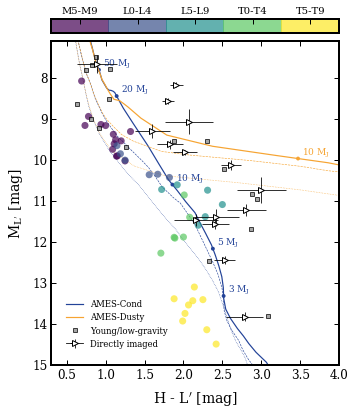

In [17]:
from IPython.display import Image
Image('color_mag.png')